# 支持向量机练习（SVM Practice）

## 项目背景

#### 项目背景：
* 1.项目基于吴恩达教授的《机器学习》课程。
* 2.数据均来源于课程配套资料。


#### 项目目的：
* 1、构建线性内核支持向量机模型
* 2、构建高斯内核支持向量机模型
* 3、调试常量C并了解其对模型优化的影响
* 4、使用支持向量机构建垃圾邮件分类器。

# 导入相关的库

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly as py
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import iplot,init_notebook_mode
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

import scipy.io as sio #因为是mat文件，需要用scipy导入

# 1.简单线性内核支持向量机

In [3]:
data = sio.loadmat(r'dataset（数据集）\ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [64]:
X1 = data['X']
y1 = data['y'].reshape(data['y'].shape[0])
X1.shape,y1.shape

((51, 2), (51,))

In [65]:
# 查看是否有缺失值
np.isnan(X1).any(),np.isnan(y1).any()

(False, False)

In [66]:
# 看一下数据分布
fig = px.scatter(x=X1[:,0], y=X1[:,1], color=y1)
fig.update_layout(height=500,width=500,xaxis=dict(title='X1'),yaxis=dict(title='X2'))
fig.show()

In [67]:
# 特征缩放（Feature Scaling）
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X1=sc_X.fit_transform(X1)

In [149]:
# 利用SVM进行线性分类，C=1
from sklearn.svm import SVC
classifier = SVC(kernel="linear",random_state=0)
classifier.fit(X1,y1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [150]:
# 看一下模型的准确度
accuracy_1 = round(classifier.score(X1,y1) * 100, 2)
print("模型准确度：",accuracy_1)

模型准确度： 98.04


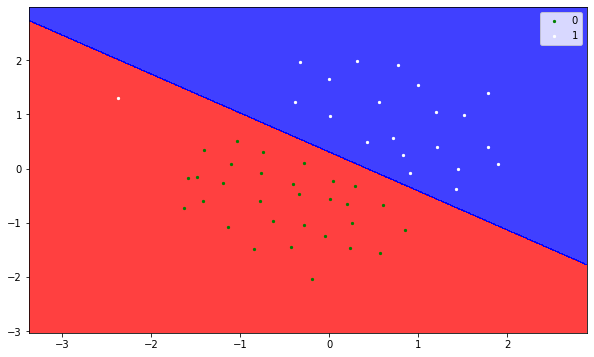

In [153]:
# 看一下分类效果
# 因为plotly未找到3维等高线图绘制方法，故用matplotlib绘制
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set,y_set = X1,y1
x1,x2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),\
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
z = classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
plt.figure(figsize=(10,6))
plt.contourf(x1,x2,z,alpha = 0.75, cmap=ListedColormap(('red','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],label = j,c=['green','white'][i],s=5)
plt.legend()
plt.show()

* 可以看出，模型在分类时，忽略了一个异常值。

In [155]:
# 我们来看看C=100时的情况
classifier2 = SVC(kernel="linear",C=100,random_state=0)
classifier2.fit(X1,y1)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [156]:
# 看一下模型的准确度
accuracy_2 = round(classifier2.score(X1,y1) * 100, 2)
print("模型准确度：",accuracy_2)

模型准确度： 100.0


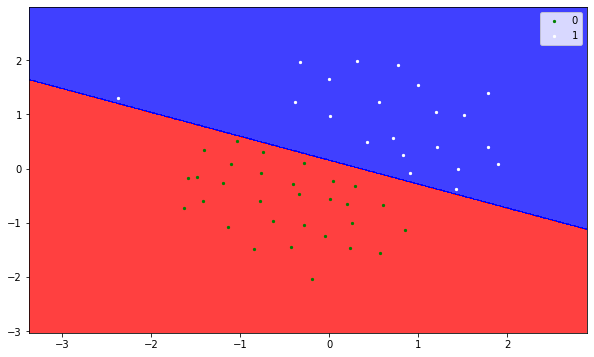

In [157]:
# 看一下分类效果
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set,y_set = X1,y1
x1,x2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),\
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
z = classifier2.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
plt.figure(figsize=(10,6))
plt.contourf(x1,x2,z,alpha = 0.75, cmap=ListedColormap(('red','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],label = j,c=['green','white'][i],s=5)
plt.legend()
plt.show()

* C增加到100，我们得到了100%正确的模型，但该模型出现了过度拟合的问题，泛化能力减弱。
* 我们可以得到结论是：由于C是正则化参数的倒数，当：
    * C过大时，正则化弱化，模型容易出现高方差、过拟合的问题
    * C过小时，正则化加强，模型容易出现高偏差、欠拟合的问题。

# 2.高斯内核支持向量机

In [4]:
data2 = sio.loadmat(r'dataset（数据集）\ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [172]:
X2 = data2['X']
y2 = data2['y'].reshape(data2['y'].shape[0])
X2.shape,y2.shape

((863, 2), (863,))

In [173]:
# 查看是否有缺失值
np.isnan(X2).any(),np.isnan(y2).any()

(False, False)

In [161]:
# 看一下数据分布
fig = px.scatter(x=X2[:,0], y=X2[:,1], color=y2)
fig.update_layout(height=500,width=500,xaxis=dict(title='X1'),yaxis=dict(title='X2'))
fig.show()

In [184]:
# 特征缩放（Feature Scaling）
X2=sc_X.fit_transform(X2)

In [185]:
# 利用SVM进行高斯内核非线性分类，C=1
from sklearn.svm import SVC
classifier = SVC(kernel="rbf",gamma = 'scale',random_state=0)
classifier.fit(X2,y2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [186]:
# 看一下模型准确度
accuracy = round(classifier.score(X2,y2) * 100, 2)
print("模型准确度：",accuracy)

模型准确度： 90.5


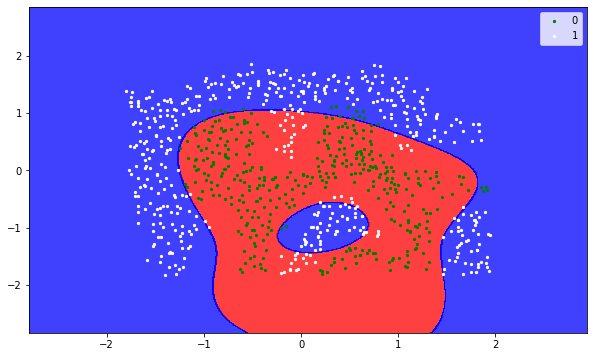

In [187]:
# 看一下分类效果
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set,y_set = X2,y2
x1,x2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),\
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
z = classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
plt.figure(figsize=(10,6))
plt.contourf(x1,x2,z,alpha = 0.75, cmap=ListedColormap(('red','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],label = j,c=['green','white'][i],s=5)
plt.legend()
plt.show()

In [195]:
# 我们来看一下C=100,核系数设置为20
from sklearn.svm import SVC
classifier2 = SVC(kernel="rbf",C=100,gamma = 20,random_state=2)
classifier2.fit(X2,y2)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=False, random_state=2, shrinking=True, tol=0.001,
    verbose=False)

In [196]:
# 看一下模型准确度
accuracy = round(classifier2.score(X2,y2) * 100, 2)
print("模型准确度：",accuracy)

模型准确度： 100.0


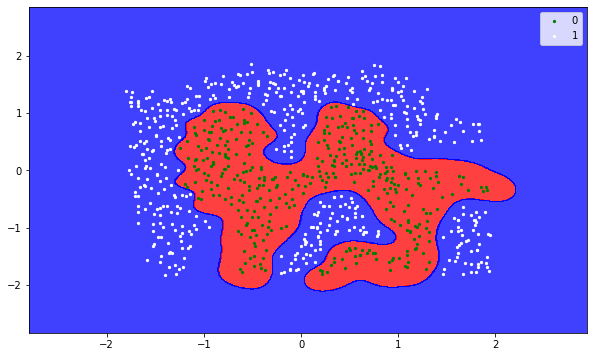

In [197]:
# 看一下分类效果
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set,y_set = X2,y2
x1,x2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),\
                    np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01))
z = classifier2.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
plt.figure(figsize=(10,6))
plt.contourf(x1,x2,z,alpha = 0.75, cmap=ListedColormap(('red','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],label = j,c=['green','white'][i],s=5)
plt.legend()
plt.show()

* 可以看出来，第二个模型过度拟合了。

# 3.实战：垃圾邮件分类

In [5]:
spam_train = sio.loadmat(r'dataset（数据集）\spamTrain.mat')
spam_test = sio.loadmat(r'dataset（数据集）\spamTest.mat')

spam_train.keys(),spam_test.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X', 'y']),
 dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest']))

In [203]:
X_train = spam_train['X']
X_test = spam_test['Xtest']
y_train = spam_train['y'].ravel()
y_test = spam_test['ytest'].ravel()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 1899), (4000,), (1000, 1899), (1000,))

* 可知一共有1899个特征（即识别文本）。

In [206]:
# 特征缩放（Feature Scaling）
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [211]:
# 利用SVM进行高斯内核非线性分类
from sklearn.svm import SVC
classifier = SVC(kernel="rbf",gamma = 'scale',random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [212]:
# 看一下模型准确度
accuracy_train = round(classifier.score(X_train,y_train) * 100, 2)
print("训练集模型准确度：",accuracy_train)

accuracy_test = round(classifier.score(X_test,y_test) * 100, 2)
print("测试集模型准确度：",accuracy_test)

训练集模型准确度： 99.1
测试集模型准确度： 98.2


* 测试集比训练集的准确度略低了一点，说明我们模型还是有优化空间的。
* 我们可以通过调整一些参数来优化模型。

# 鸣谢：
感谢黄海广博士提供的读书笔记及各项资料，我会在机器学习路上继续加油！